In [60]:
# Load the Dataset and Convert It into a Table

import pandas as pd # Import pandas for data manipulation

# Load the dataset from the uploaded CSV file
df = pd.read_csv('/content/bank-additional.csv', header=None, skiprows=1)

# Split the data into separate columns based on the delimiter (semicolon in this case)
df_split = df[0].str.split(';', expand=True)

# Display the first few rows to verify the split
df_split.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",...,2,999,0,"""nonexistent""",-1.8,92.893,-46.2,1.313,5099.1,"""no"""
1,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",...,4,999,0,"""nonexistent""",1.1,93.994,-36.4,4.855,5191,"""no"""
2,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",...,1,999,0,"""nonexistent""",1.4,94.465,-41.8,4.962,5228.1,"""no"""
3,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",...,3,999,0,"""nonexistent""",1.4,94.465,-41.8,4.959,5228.1,"""no"""
4,47,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""mon""",...,1,999,0,"""nonexistent""",-0.1,93.2,-42,4.191,5195.8,"""no"""


In [23]:
# Assign Column Names

# Assign column names
df_split.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                    'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
                    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

# Verify the updated DataFrame
df_split.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",...,2,999,0,"""nonexistent""",-1.8,92.893,-46.2,1.313,5099.1,"""no"""
1,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",...,4,999,0,"""nonexistent""",1.1,93.994,-36.4,4.855,5191,"""no"""
2,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",...,1,999,0,"""nonexistent""",1.4,94.465,-41.8,4.962,5228.1,"""no"""
3,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",...,3,999,0,"""nonexistent""",1.4,94.465,-41.8,4.959,5228.1,"""no"""
4,47,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""mon""",...,1,999,0,"""nonexistent""",-0.1,93.2,-42,4.191,5195.8,"""no"""


In [24]:
# Convert Categorical Variables to Numeric Values

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                    'day_of_week', 'poutcome', 'y']

# Apply label encoding to categorical columns
for col in categorical_cols:
    df_split[col] = label_encoder.fit_transform(df_split[col])

# Display the transformed DataFrame
df_split.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.2,-42,4.191,5195.8,0


In [64]:
# Check the number of rows and columns in the transformed DataFrame
print(f"Number of rows: {df_split.shape[0]}")
print(f"Number of columns: {df_split.shape[1]}")

Number of rows: 4119
Number of columns: 21


In [33]:
# Explore the Dataset

# Check for missing values
print("Missing values in each column:")
print(df_split.isnull().sum())

# Check the data types of each column
print("\nData types of each column:")
print(df_split.dtypes)

# Get a summary of the dataset (count, mean, std, min, max, etc.)
print("\nSummary statistics of the dataset:")
print(df_split.describe())

# Check class distribution of target variable (y)
print("\nClass distribution of target variable (y):")
print(df_split['y'].value_counts())

Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data types of each column:
age               object
job                int64
marital            int64
education          int64
default            int64
housing            int64
loan               int64
contact            int64
month              int64
day_of_week        int64
duration          object
campaign          object
pdays             object
previous          object
poutcome           int64
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y       

Training data shape: (3295, 20)
Test data shape: (824, 20)

Explained variance ratio of each principal component:
[0.21145843 0.08469517 0.08046565 0.06815082 0.05801865 0.05540858
 0.05368993 0.05014731 0.04926522 0.04638554]


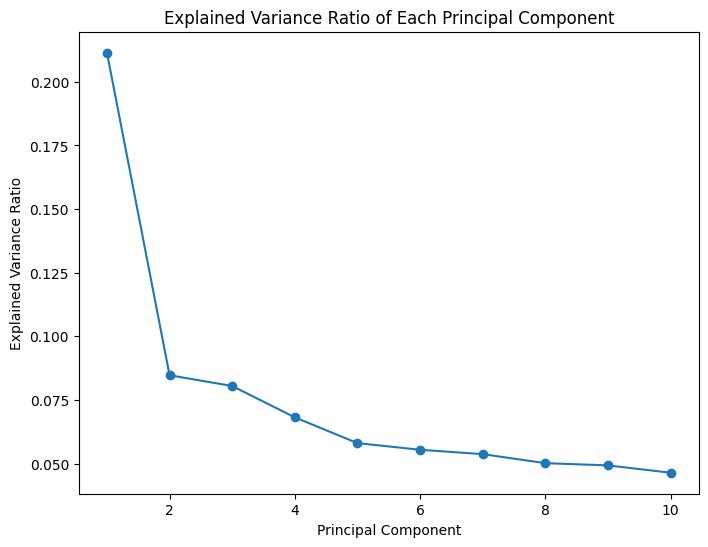


Shape of transformed training data with PCA: (3295, 10)
Shape of transformed test data with PCA: (824, 10)


In [47]:
#  Data Preparation (Preprocessing)

from sklearn.model_selection import train_test_split

# Define the feature columns (X) and target column (y)
X = df_split.drop(columns=['y'])
y = df_split['y']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# **Principal Component Analysis (PCA)** for Dimensionality Reduction

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data before applying PCA
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler as training)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=10)  # You can choose the number of components based on your requirement
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the amount of variance explained by each principal component
print("\nExplained variance ratio of each principal component:")
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio to visualize how much each component contributes
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Check the shape of the transformed data
print("\nShape of transformed training data with PCA:", X_train_pca.shape)
print("Shape of transformed test data with PCA:", X_test_pca.shape)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Hyperparameters for Random Forest:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       732
           1       0.54      0.28      0.37        92

    accuracy                           0.89       824
   macro avg       0.73      0.63      0.66       824
weighted avg       0.87      0.89      0.88       824

Accuracy: 0.8932038834951457


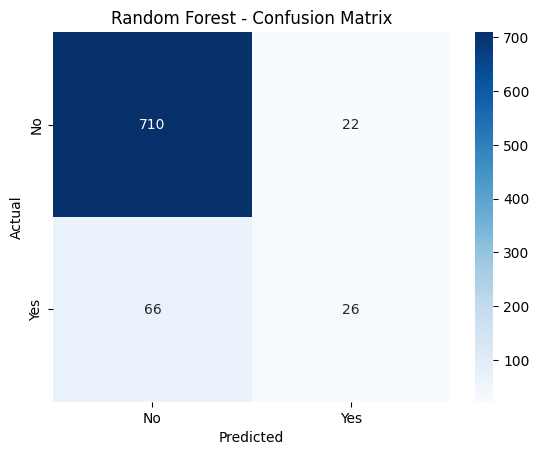

In [48]:
# Machine Learning Models

# Random Forest

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.model_selection import GridSearchCV  # GridSearchCV for hyperparameter tuning
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Metrics for model evaluation
import seaborn as sns  # For plotting
import matplotlib.pyplot as plt  # For plotting

# Define the simplified hyperparameters to tune for Random Forest
rf_param_grid = {
    'n_estimators': [100],  # Reduce the number of trees to 100
    'max_depth': [None, 10],  # Reduce the max depth (None or 10)
    'min_samples_split': [2],  # Fewer options for splitting (only 2)
    'min_samples_leaf': [1],   # Fewer options for leaf nodes (only 1)
    'bootstrap': [True]        # Keep bootstrap as True
}

# Set up GridSearchCV to search for the best combination of hyperparameters
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),  # Model to tune
                              param_grid=rf_param_grid,  # Hyperparameter grid
                              cv=3,                      # Cross-validation with 3 folds
                              n_jobs=-1,                 # Use all available cores for parallel computation
                              verbose=2,                 # Print detailed output
                              scoring='accuracy')       # Use accuracy for evaluation

# Fit the GridSearchCV to the training data to find the best model
rf_grid_search.fit(X_train_pca, y_train)  # Fit on the PCA transformed training data

# Display the best hyperparameters found by GridSearchCV
print("Best Hyperparameters for Random Forest:")
print(rf_grid_search.best_params_)

# Retrieve the best model from GridSearchCV
best_rf_model = rf_grid_search.best_estimator_  # Best Random Forest model with tuned hyperparameters

# Predict the target variable on the test set
y_pred_rf = best_rf_model.predict(X_test_pca)  # Predictions using the PCA transformed test data

# Evaluate the Random Forest model's performance
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))  # Show detailed classification report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))  # Show accuracy score

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)  # Compute confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()  # Display the confusion matrix


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Hyperparameters for Neural Network:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}

Neural Network - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       732
           1       0.59      0.41      0.49        92

    accuracy                           0.90       824
   macro avg       0.76      0.69      0.72       824
weighted avg       0.89      0.90      0.90       824

Accuracy: 0.9029126213592233


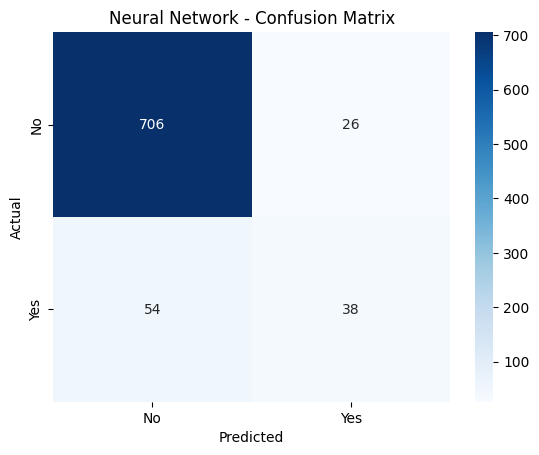

In [50]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier  # Neural Network (MLP) classifier
from sklearn.model_selection import GridSearchCV  # GridSearchCV for hyperparameter tuning
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Metrics for model evaluation
import seaborn as sns  # For plotting
import matplotlib.pyplot as plt  # For plotting

# Define the hyperparameters to tune for Neural Network (MLP)
nn_param_grid = {
    'hidden_layer_sizes': [(100,)],  # Number of neurons in each hidden layer (reduced)
    'activation': ['relu'],  # Activation functions for hidden layers (reduced to one option)
    'solver': ['adam'],  # Optimization algorithms (using only 'adam')
    'alpha': [0.0001],  # Regularization parameter (reduced)
    'learning_rate': ['constant']  # Learning rate scheduling (reduced to 'constant')
}

# Set up GridSearchCV to search for the best combination of hyperparameters
nn_grid_search = GridSearchCV(estimator=MLPClassifier(random_state=42),  # Model to tune
                              param_grid=nn_param_grid,  # Hyperparameter grid
                              cv=2,                      # Cross-validation with 2 folds (reduced)
                              n_jobs=-1,                 # Use all available cores for parallel computation
                              verbose=2,                 # Print detailed output
                              scoring='accuracy')       # Use accuracy for evaluation

# Fit the GridSearchCV to the training data to find the best model
nn_grid_search.fit(X_train_pca, y_train)  # Fit on the PCA transformed training data

# Display the best hyperparameters found by GridSearchCV
print("Best Hyperparameters for Neural Network:")
print(nn_grid_search.best_params_)

# Retrieve the best model from GridSearchCV
best_nn_model = nn_grid_search.best_estimator_  # Best Neural Network model with tuned hyperparameters

# Predict the target variable on the test set
y_pred_nn = best_nn_model.predict(X_test_pca)  # Predictions using the PCA transformed test data

# Evaluate the Neural Network model's performance
print("\nNeural Network - Classification Report:")
print(classification_report(y_test, y_pred_nn))  # Show detailed classification report
print("Accuracy:", accuracy_score(y_test, y_pred_nn))  # Show accuracy score

# Confusion Matrix for Neural Network
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)  # Compute confusion matrix
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()  # Display the confusion matrix


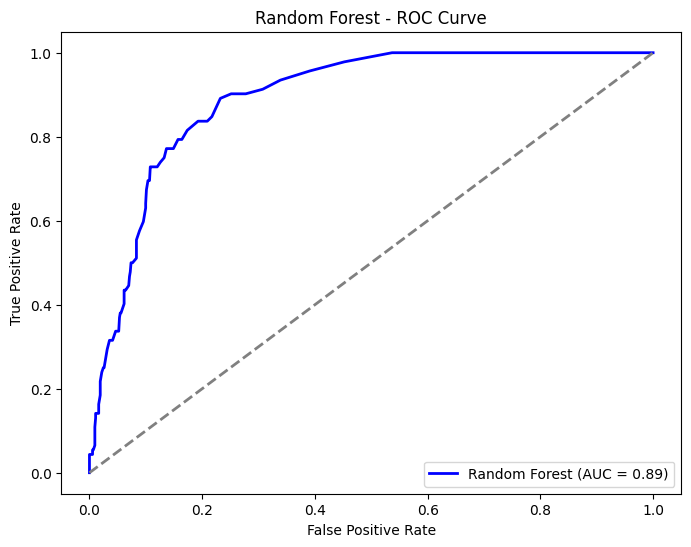

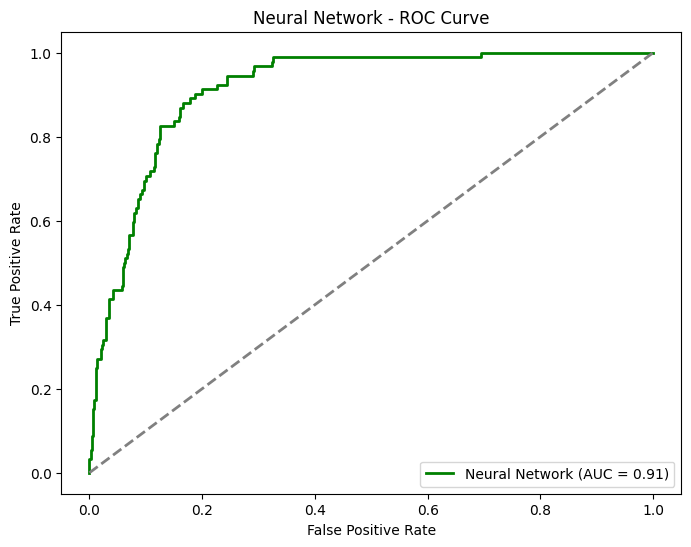

In [51]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc  # For ROC Curve and AUC calculation
import matplotlib.pyplot as plt  # For plotting

# Random Forest ROC Curve

# Get the predicted probabilities for the test set
y_prob_rf = best_rf_model.predict_proba(X_test_pca)[:, 1]  # Probability of the positive class

# Compute the ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the Random Forest ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Neural Network ROC Curve

# Get the predicted probabilities for the test set
y_prob_nn = best_nn_model.predict_proba(X_test_pca)[:, 1]  # Probability of the positive class

# Compute the ROC curve and AUC for Neural Network
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the Neural Network ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='green', lw=2, label='Neural Network (AUC = {:.2f})'.format(roc_auc_nn))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network - ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
# Compare Results

# Compare the accuracy of both models
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")
print(f"Neural Network Accuracy: {accuracy_nn:.4f}")

# You can also compare other metrics using classification_report or manually print each metric


Random Forest Accuracy: 0.8932
Neural Network Accuracy: 0.9029


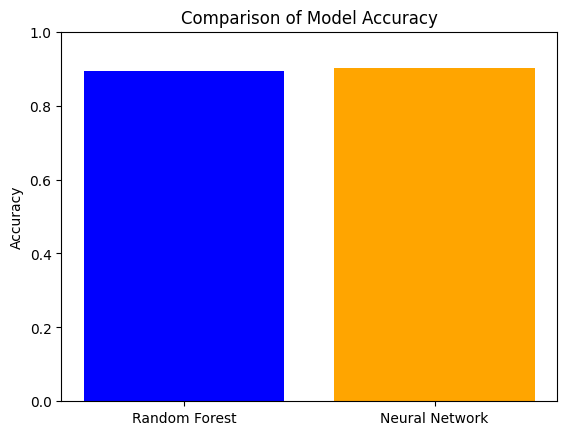

In [53]:
# Visualize Results

# Bar chart comparison of accuracy
metrics = ['Random Forest', 'Neural Network']
accuracy = [accuracy_rf, accuracy_nn]

plt.bar(metrics, accuracy, color=['blue', 'orange'])
plt.title('Comparison of Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [54]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification reports as dictionaries for both models
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

# Convert the dictionaries to DataFrames for better visualization
df_metrics_rf = pd.DataFrame(report_rf).transpose()
df_metrics_nn = pd.DataFrame(report_nn).transpose()

print("\nRandom Forest Metrics:")
print(df_metrics_rf)

print("\nNeural Network Metrics:")
print(df_metrics_nn)


Random Forest Metrics:
              precision    recall  f1-score     support
0              0.914948  0.969945  0.941645  732.000000
1              0.541667  0.282609  0.371429   92.000000
accuracy       0.893204  0.893204  0.893204    0.893204
macro avg      0.728308  0.626277  0.656537  824.000000
weighted avg   0.873271  0.893204  0.877980  824.000000

Neural Network Metrics:
              precision    recall  f1-score     support
0              0.928947  0.964481  0.946381  732.000000
1              0.593750  0.413043  0.487179   92.000000
accuracy       0.902913  0.902913  0.902913    0.902913
macro avg      0.761349  0.688762  0.716780  824.000000
weighted avg   0.891522  0.902913  0.895111  824.000000


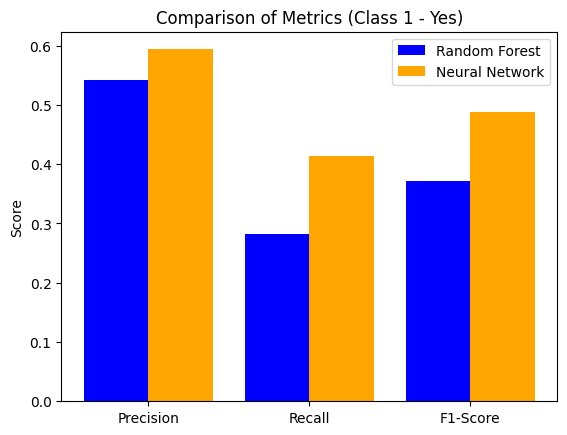

In [55]:
import matplotlib.pyplot as plt

# Metrics for comparison
metrics = ['Precision', 'Recall', 'F1-Score']
rf_values = [df_metrics_rf.loc['1', 'precision'], df_metrics_rf.loc['1', 'recall'], df_metrics_rf.loc['1', 'f1-score']]
nn_values = [df_metrics_nn.loc['1', 'precision'], df_metrics_nn.loc['1', 'recall'], df_metrics_nn.loc['1', 'f1-score']]

# Plot bar chart for comparison
x = range(len(metrics))
plt.bar(x, rf_values, width=0.4, label='Random Forest', color='blue', align='center')
plt.bar([p + 0.4 for p in x], nn_values, width=0.4, label='Neural Network', color='orange', align='center')

plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Comparison of Metrics (Class 1 - Yes)')
plt.legend()
plt.show()